# Model Development

The objective is to build a model so as to get accurate predictions of price using one or the other features of the car price and the data from the car price dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Creating a linear regression object.

In [2]:
df = pd.read_csv("clean_df.csv")
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [3]:
x = df[['highway-mpg']]
y = df[['price']]

Fitting linear model using highway-mpg :

In [4]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the price values using the highway-mpg values of the dataset itself 

In [5]:
Yhat = lm.predict(x)
Yhat[0:5]

array([[16254.26934067],
       [17077.0977727 ],
       [13785.78404458],
       [20368.41150083],
       [17899.92620473]])

In [6]:
lm.intercept_

array([38470.6370055])

In [7]:
lm.coef_

array([[-822.82843203]])

In [8]:
df.drop(['Unnamed: 0'], axis=1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,normalized-height,normalized-width,normalized-length,horsepower-binned,price-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,8.703704,11.190476,0.816054,0.890278,0.811148,Low,Low
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,9.038462,12.368421,0.876254,0.909722,0.822681,Medium,Low
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,7.833333,9.791667,0.908027,0.919444,0.848630,Low,Low
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,10.681818,13.055556,0.908027,0.922222,0.848630,Low,Low
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,19,25,15250.0,9.400000,12.368421,0.887960,0.920833,0.851994,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,23,28,16845.0,8.392857,10.217391,0.928094,0.956944,0.907256,Low,Low
196,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,19,25,19045.0,9.400000,12.368421,0.928094,0.955556,0.907256,Medium,Medium
197,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,18,23,21485.0,10.217391,13.055556,0.928094,0.956944,0.907256,Medium,Medium
198,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,26,27,22470.0,8.703704,9.038462,0.928094,0.956944,0.907256,Low,Medium


###  Creating another Linear Regression model based on engine-size

In [9]:
X1 = df[['engine-size']]
Y1 = df['price']
lm1 = LinearRegression()
lm1.fit(X1, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lm1.coef_ , lm.intercept_

(array([166.8621392]), array([38470.6370055]))

In [11]:
Yhat = lm1.predict(X1)[0:5]
Yhat

array([13729.63711709, 17400.60417954, 10225.53219385, 14730.80995231,
       14730.80995231])

### Creating a multiple linear regression model

We found out during exploratory data analysis that there are multiple features that can help predict price as they had a good correlation score.
The features were horsepower, curb-weight, engine-size, highway-mpg.
Developing a model based on that.

In [12]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fitting the linear model using the variables

In [13]:
lm2 = LinearRegression()
lm2.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lm2.intercept_ , lm2.coef_

(-15807.307965154318,
 array([53.59649869,  4.70573919, 81.48768427, 36.12867113]))

In [15]:
Yhat = lm2.predict([[128, 2700, 140, 24]])
Yhat

array([16033.90358869])

# Model Evaluation

### Residual plot

Creating a residual plot between highway-mpg and price to check the variance of the two variables

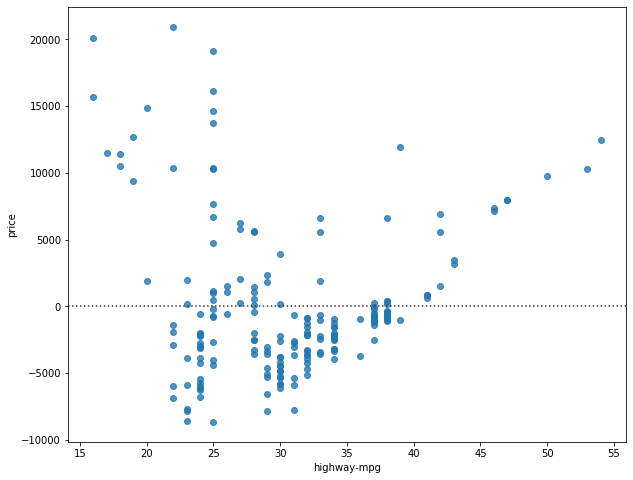

In [16]:
import seaborn as sns
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])

Residual plot shows that highway-mpg may not be having a linear relationship with respect to price of the car.

### Distribution plot
Distribution plot is used for evaluating a multiple regression model by checking the distribution of the predicted values for the values of the attributes that we give using the table. This is typically used for in-sample evaluation and is used to predict values for the values given in the table.


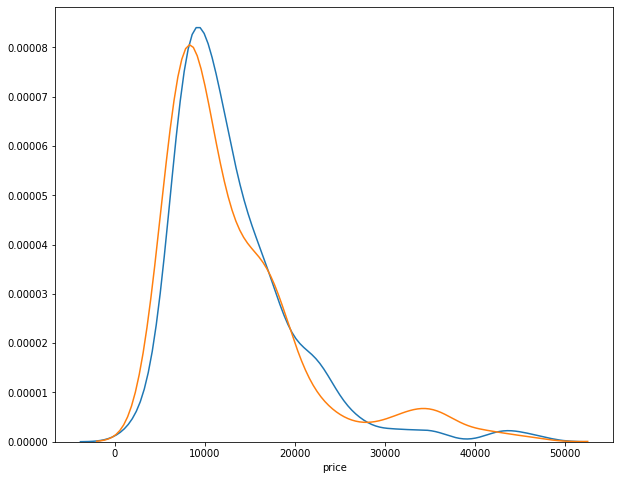

In [18]:
lm3 = LinearRegression()
X = df[['engine-size']]
Y = df['price']
lm3.fit(X, Y)
Yhat = lm3.predict(X)
plt.figure(figsize=(10,8))
sns.distplot(Yhat, hist=False)
sns.distplot(Y, hist=False)

The distribution plot shows that the predictions are accurate for feature of engine-size vs price. However, the predictions get a little blurry after 20000 mark. This maybe because there's very little data about the car variants in that range.

Hence, we found out that the price of the car can be accurately predicted using it's features and therefore, we can know if the car is being underpriced or overpriced using the regression models.